In [30]:
#Libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import json
df = pd.read_csv('bulk_output.csv')
with open('rep_to_id.json', 'r') as f:
    rep_to_id_dict = json.load(f)

#Printing out df for later reference
# print(df.head())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27851 entries, 0 to 27850
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Representative   27851 non-null  object 
 1   BioGuideID       27851 non-null  object 
 2   TransactionDate  27851 non-null  object 
 3   Ticker           27851 non-null  object 
 4   Transaction      27851 non-null  object 
 5   Range            27851 non-null  object 
 6   House            27851 non-null  object 
 7   Amount           27851 non-null  float64
 8   Party            27851 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.9+ MB
None


In [58]:
# Function to check representative name against its id

In [59]:
#Datetime conversion
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
print(df.dtypes)

Representative             object
BioGuideID                 object
TransactionDate    datetime64[ns]
Ticker                     object
Transaction              category
Range                      object
House                      object
Amount                    float64
Party                      object
dtype: object


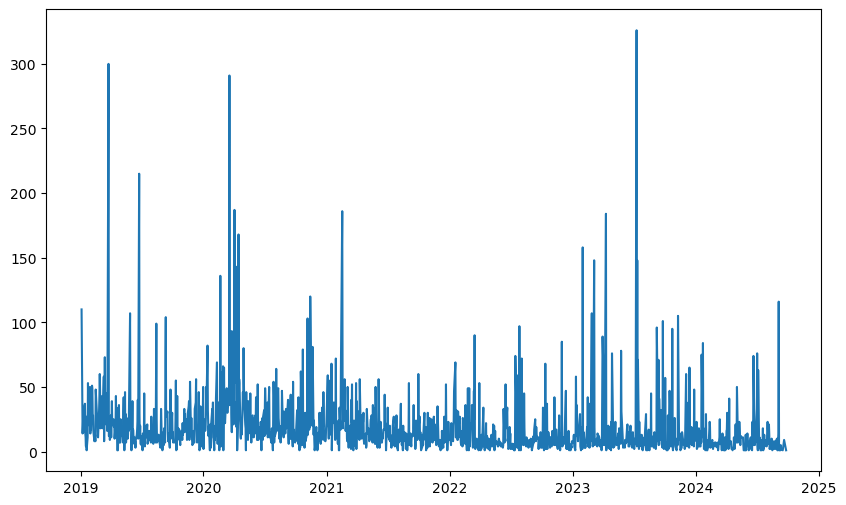

In [60]:
#Number of transactions over time
# group by TransactionDate and count the number of transactions
df_grouped = df.groupby('TransactionDate').size()

# create a figure and axis object with figsize
fig, ax = plt.subplots(figsize=(10,6))

# plot the data
plt.plot(df_grouped.index, df_grouped.values)

plt.show()

In [61]:
#Woah crazy spikes, return those values
top_spikes = df_grouped.nlargest(10)
print(top_spikes)

TransactionDate
2023-07-10    326
2019-03-25    300
2020-03-18    291
2019-06-24    215
2020-04-02    187
2021-02-16    186
2023-04-10    184
2020-04-14    168
2023-01-31    158
2023-03-06    148
dtype: int64


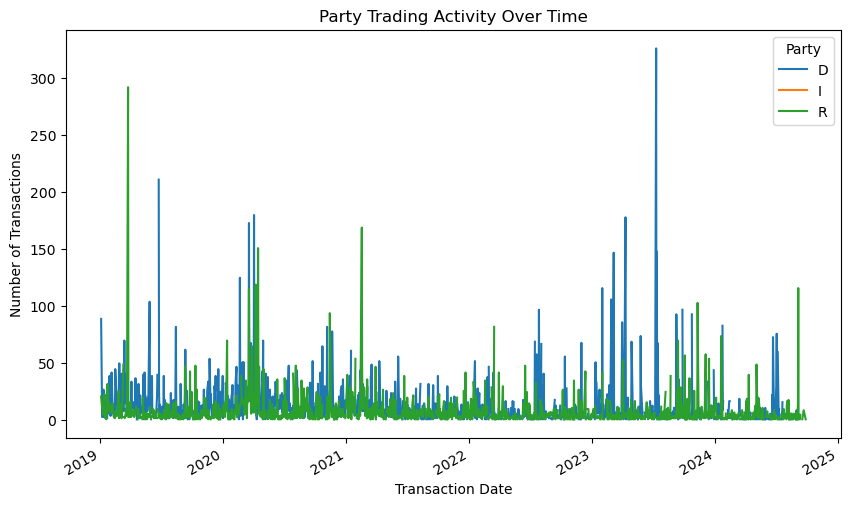

In [62]:
# group by Party and TransactionDate, and count the number of transactions
df_grouped = df.groupby(['Party', 'TransactionDate']).size().reset_index(name='Count')

# pivot the data to get a separate column for each party
df_pivoted = df_grouped.pivot(index='TransactionDate', columns='Party', values='Count')

# create a figure and axis object with figsize
fig, ax = plt.subplots(figsize=(10,6))

# plot the data
df_pivoted.plot(ax=ax)

plt.xlabel('Transaction Date')
plt.ylabel('Number of Transactions')
plt.title('Party Trading Activity Over Time')

plt.show()

In [63]:
#Track the different types of transactions over time
#Essentially when selling was popular or when purchasing was popular

Ticker
MSFT             584
AAPL             450
NVDA             241
AMZN             219
DIS              176
                ... 
GSS                1
LLYVA              1
PART INTEREST      1
DUE 10/01/203      1
ESL                1
Name: count, Length: 2886, dtype: int64


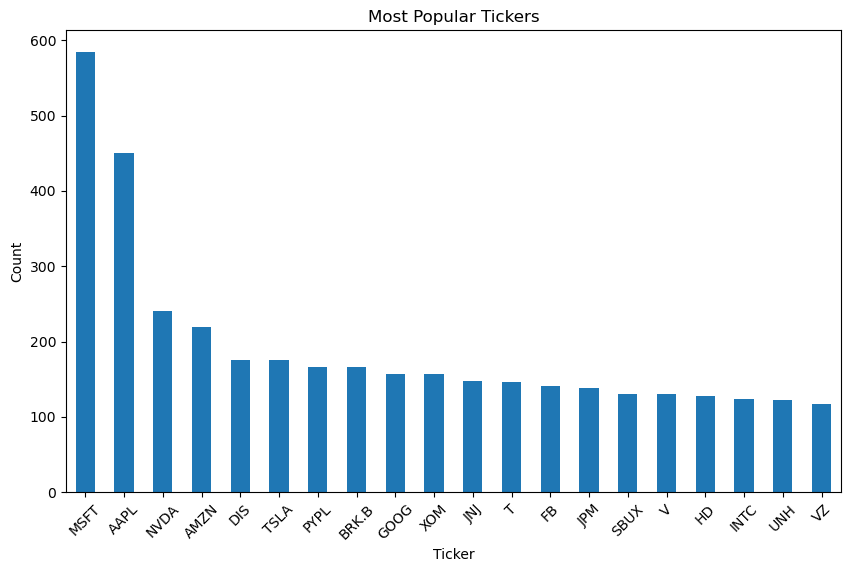

In [64]:
#Finding the most popular tickers
ticker_counts = df['Ticker'].value_counts()
print(ticker_counts)
plt.figure(figsize=(10, 6))
ticker_counts.head(20).plot(kind='bar')
plt.title('Most Popular Tickers')
plt.xlabel('Ticker')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [69]:
#Finding most active representatives 
top_10_reps = df['BioGuideID'].value_counts().nlargest(10)
print(top_10_reps)

BioGuideID
G000583    2531
L000590    1262
G000599    1184
T000278    1160
C001123    1141
P000616     842
P000612     824
F000462     804
L000579     784
G000584     768
Name: count, dtype: int64
